In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import pydotplus
import graphviz
import time
from IPython.display import Image
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import accuracy_score
from sklearn import linear_model
%matplotlib inline

In [2]:
#import data and drop game id
df = pd.read_csv('skillcraft.csv')
df.drop('GameID', 1, inplace=True)
df = df.apply(lambda x: x.replace('?', '0'))

In [3]:
X = df.drop('LeagueIndex', 1)
#X = X.astype(float)
y = df.LeagueIndex

start_time = time.time()

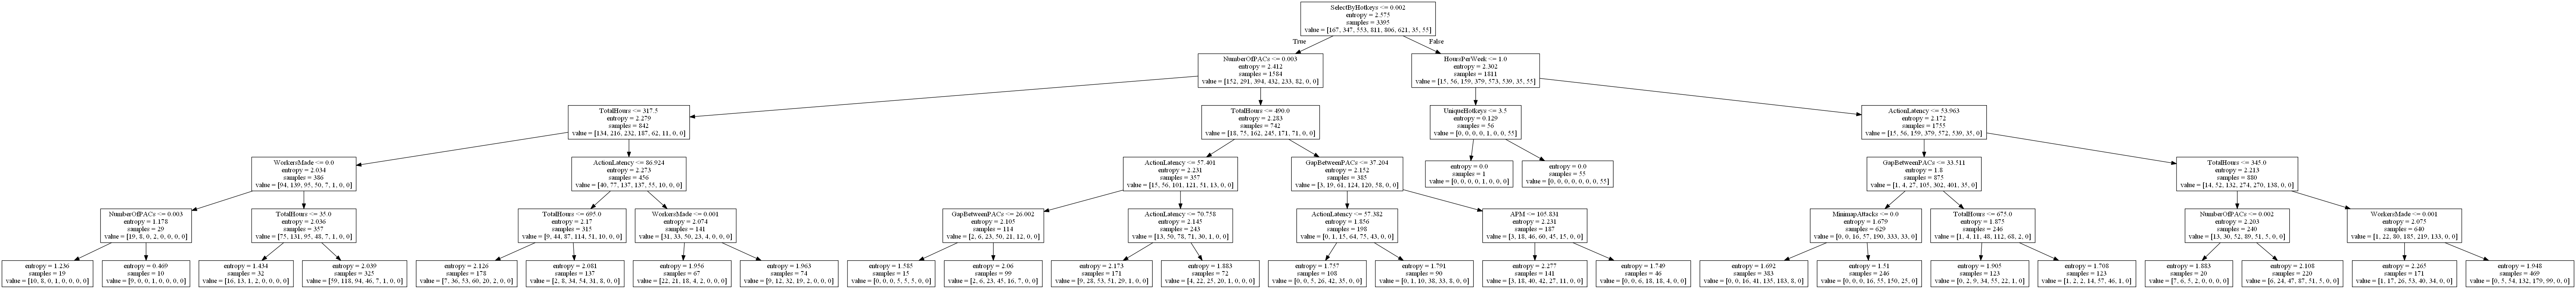

In [13]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=5,
    max_depth=5)

decision_tree.fit(X, y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=False
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [15]:
rfc = ensemble.RandomForestClassifier(n_estimators=500)
rfc.fit(X, y)
cross_val_score(rfc, X, y, cv=10)

array([0.43313953, 0.42397661, 0.46491228, 0.4398827 , 0.46041056,
       0.43657817, 0.39940828, 0.41071429, 0.4047619 , 0.41071429])

In [16]:
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X.columns), 
             reverse=True))

[(0.0953, 'ActionLatency'), (0.0825, 'APM'), (0.0746, 'TotalHours'), (0.0709, 'NumberOfPACs'), (0.0704, 'SelectByHotkeys'), (0.0682, 'GapBetweenPACs'), (0.063, 'AssignToHotkeys'), (0.0571, 'WorkersMade'), (0.054, 'MinimapAttacks'), (0.0532, 'ActionsInPAC'), (0.0523, 'MinimapRightClicks'), (0.0487, 'Age'), (0.0474, 'HoursPerWeek'), (0.0436, 'TotalMapExplored'), (0.0344, 'UniqueHotkeys'), (0.0342, 'ComplexAbilitiesUsed'), (0.0296, 'UniqueUnitsMade'), (0.0206, 'ComplexUnitsMade')]


In [6]:
rfr = ensemble.RandomForestRegressor()

rfr.fit(X, y)
print(sorted(zip(map(lambda x: round(x, 4), rfr.feature_importances_), X.columns), 
             reverse=True))

[(0.2791, 'APM'), (0.2414, 'ActionLatency'), (0.0931, 'TotalHours'), (0.0478, 'Age'), (0.0446, 'AssignToHotkeys'), (0.0398, 'MinimapAttacks'), (0.0395, 'SelectByHotkeys'), (0.0278, 'GapBetweenPACs'), (0.0273, 'WorkersMade'), (0.0244, 'NumberOfPACs'), (0.0232, 'MinimapRightClicks'), (0.023, 'HoursPerWeek'), (0.0219, 'ActionsInPAC'), (0.0202, 'TotalMapExplored'), (0.0154, 'ComplexAbilitiesUsed'), (0.0146, 'UniqueHotkeys'), (0.0107, 'UniqueUnitsMade'), (0.0061, 'ComplexUnitsMade')]


In [7]:
cross_val_score(rfr, X, y, cv=10)

array([0.54150235, 0.57168648, 0.57139203, 0.57975828, 0.57123952,
       0.54269479, 0.48625691, 0.50816612, 0.47359496, 0.5432234 ])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
rf = ensemble.RandomForestClassifier(n_estimators=500, oob_score=True)
rf.fit(X_train, y_train)

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.422
Mean accuracy score: 0.412


In [10]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
pca = PCA()
pca.fit(X_train)
cpts = pd.DataFrame(pca.transform(X_train))
x_axis = np.arange(1, pca.n_components_+1)
pca_scaled = PCA()
pca_scaled.fit(X_train_scaled)
cpts_scaled = pd.DataFrame(pca.transform(X_train_scaled))

In [12]:
rf = ensemble.RandomForestRegressor(n_estimators=500, oob_score=True)
rf.fit(X_train, y_train)

predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate:  0.63
Test data R-2 score:  0.67
Test data Spearman correlation: 0.803
Test data Pearson correlation: 0.821
